# Библиотеки

In [ ]:
import os
import pickle
from collections import defaultdict

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme()

import torch

from tqdm.notebook import tqdm as tqdm_n
from tqdm import tqdm
from functools import partial
from time import gmtime, strftime, time

from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset

from torchvision.transforms import v2
from torchvision.utils import save_image

In [2]:
ls

 autors.csv
 autors.ods
 demo.ipynb
 DocEnTR/
 logs/
 MNIST/
 my_rename.txt
 names1.csv
 names2.csv
 Natalia/
 Natalia.gz
 parsing1.ipynb
 parsing2.ipynb
 Potanin.ipynb
 strokes_cut/
 true_rename.txt
'Государственный архив Красноярского края и КККМ.docx'
 КККМ/
 КККМ_bin/
'КККМ_bin(first).zip'
 КККМ_bin.zip
 КККМfolder10_bin/
 КККМfolder10_bin.zip
 КККМfolder10_strokes_bin/
 КККМfolder10_strokes_bin.zip
 КККМFOLDER_bin/
 КККМFOLDER_bin.zip
 КККМ_lines/
 КККМ_lines_bin/
 КККМ_lines_bin.zip
 КККМ_lines.zip
 КККМ_myrenamed/
 КККМ_myrenamed.zip
 КККМ_pickles/
 КККМ_pickles.zip
 КККМ_strokes_bin/
 КККМ_strokes_bin.zip
 КККМ.zip


# MNIST

In [3]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.8 MB/s eta 0:00:00


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 22.0M/22.0M [00:02<00:00, 8.11MB/s]

Extracting files...


Path to dataset files: /home/natalkaser/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [14]:
!ls /home/natalkaser/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1

t10k-images-idx3-ubyte	t10k-labels.idx1-ubyte	 train-labels-idx1-ubyte
t10k-images.idx3-ubyte	train-images-idx3-ubyte  train-labels.idx1-ubyte
t10k-labels-idx1-ubyte	train-images.idx3-ubyte


In [16]:
!mv "{path}" .

In [17]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


In [19]:
input_path = '1'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print(len(x_train), len(x_test))

def dataset2folder(x, y, name):
    !rm -r "$name" 
    
    os.makedirs(name, exist_ok=True)

    cls2counter = defaultdict(int)
    
    for i in range(len(x)):
        image = np.array(x[i])
        cls = y[i]
        
        os.makedirs(f"{name}/{cls}", exist_ok=True)

        new_name = f"{name}/{cls}/{cls2counter[cls]}.png"
        if os.path.exists(new_name):
            raise TypeError

        # print(new_name)
        cv2.imwrite(new_name, image)
        cls2counter[cls] += 1

    print(cls2counter)



dataset2folder(x_train, y_train, "MNIST/train")
dataset2folder(x_test, y_test, "MNIST/test")

60000 10000
rm: cannot remove 'MNIST/train_mnist': No such file or directory
defaultdict(<class 'int'>, {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851})
rm: cannot remove 'MNIST/test_mnist': No such file or directory
defaultdict(<class 'int'>, {7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974})


In [20]:
!rm -r 1

# My_Dataset

In [3]:
# https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

class My_Dataset(Dataset):
    def __init__(self, folder, transform):
        super().__init__()

        self.folder = folder
        self.transform = transform
        
        self.dir_names = sorted(os.listdir(folder)) # ["000" , "001", ...]
        self.num_cls = len(self.dir_names)

        self.dir2cls = {dir : i for i, dir in enumerate(self.dir_names)}
        self.cls2dir = {cls : dir for dir, cls in self.dir2cls.items()}

        self.dataset = [] # список всех путей до изображений
        # image_idx = 0

        self.cls2paths = defaultdict(list) # по cls получить все изображения класса

        for dir in self.dir_names:
            dir_path = os.path.join(folder, dir)

            for i in sorted(os.listdir(dir_path)):
                image_path = os.path.join(dir_path, i)
                cls = self.dir2cls[dir]

                self.dataset.append((image_path, cls))
                self.cls2paths[cls].append(image_path)
                # image_idx += 1

        self.cls2count = {cls : len(idxs) for cls, idxs in self.cls2paths.items()}

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image_path, cls = self.dataset[idx]

        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)

        return image, cls
    

class My_TripletDataset(My_Dataset):
    
    def __getitem__(self, idx):
        anchor_path, cls = self.dataset[idx]
        anchor = self.transform(Image.open(anchor_path).convert("RGB"))

        positive_path = random.choice(self.cls2paths[cls])
        positive = self.transform(Image.open(positive_path).convert("RGB"))

        negative_cls = random.choice([i for i in range(self.num_cls) if i != cls])
        negative_path = random.choice(self.cls2paths[negative_cls])
        negative = self.transform(Image.open(negative_path).convert("RGB"))

        return anchor, positive, negative

# Functions

In [4]:
def test_pipeline(model, dataset, device, batch_size):

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for batch in loader:

        X_batch, y_batch = batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        output = model(X_batch) # torch.Size([BATCH, NUM_CLS])
        print(f"X_batch: {X_batch.shape}\ny_batch: {y_batch.shape}\nmodel:   {output.shape}")
        break


def save_logs(logs, path):
    with open(path, "wb") as f:
        pickle.dump(logs, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_logs(path):
    with open(path, "rb") as f:
        logs = pickle.load(f)

    return logs

def write2file(file, text):
    with open(file, 'a') as f:
        f.write(text + "\n")

def my_time():
    return strftime("%Y-%m-%d %H:%M:%S ", gmtime(time() + 3 * 60 * 60))

def my_timediff(start_time):
    return strftime("%H:%M:%S", gmtime(time() - start_time))


def number_of_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    

def Min_size(size):
    def fun(tensor, size=size):
        c, h, w = tensor.shape
        new_h = size
        new_w = int(w * new_h / h)

        res = transforms.Resize((new_h, new_w))(tensor)
        return res

    return fun


def split_dataset(dataset, percent=0.8):
    train_size = int(len(dataset) * percent)
    val_size = len(dataset) - train_size

    train_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, val_size]
    )

    len_tr, len_test = len(train_dataset), len(test_dataset)
    print(f"split_dataset: Train: {len_tr} Test: {len_test} Total: {len_tr + len_test}")

    return train_dataset, test_dataset


# def find_i(logs, i, names):
#     # print(logs, i, names)
#     args = []
#     for name in names:
#         args.append(logs[name][i])
#     return args


# def print_logs(logs):
#     ans = ""

#     for i in range(len(logs["time"])):
#         time, epoch, train_loss, val_loss, train_acc, val_acc = find_i(logs, i,
#                                                                        ["time", "epoch", "train_loss", "val_loss", "train_acc", "val_acc"])
#         ans += ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
#                 (time, epoch, train_loss, val_loss, train_acc, val_acc)) + "\n"
        

#     ans += "\nMin train loss:\n"
#     i, train_loss = logs["min_train_loss"]["arg"], logs["min_train_loss"]["value"]
#     time, epoch, val_loss, train_acc, val_acc = find_i(logs, i,
#                                                        ["time", "epoch", "val_loss", "train_acc", "val_acc"])
#     ans += ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
#             (time, epoch, train_loss, val_loss, train_acc, val_acc)) + "\n"
    

#     ans += "Min val loss:\n"
#     i, val_loss = logs["min_val_loss"]["arg"], logs["min_val_loss"]["value"]
#     time, epoch, train_loss, train_acc, val_acc = find_i(logs, i,
#                                                          ["time", "epoch", "train_loss", "train_acc", "val_acc"])
#     ans += ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
#             (time, epoch, train_loss, val_loss, train_acc, val_acc)) + "\n"
    

#     ans += "Max train acc:\n"
#     i, train_acc = logs["max_train_acc"]["arg"], logs["max_train_acc"]["value"]
#     time, epoch, train_loss, val_loss, val_acc = find_i(logs, i,
#                                                         ["time", "epoch", "train_loss", "val_loss", "val_acc"])
#     ans += ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
#             (time, epoch, train_loss, val_loss, train_acc, val_acc)) + "\n"
    

#     ans += "Max val acc:\n"
#     i, val_acc = logs["max_val_acc"]["arg"], logs["max_val_acc"]["value"]
#     time, epoch, train_loss, val_loss, train_acc = find_i(logs, i,
#                                                           ["time", "epoch", "train_loss", "val_loss", "train_acc"])
#     ans += ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
#             (time, epoch, train_loss, val_loss, train_acc, val_acc)) + "\n"
        
#     return ans

# Trainer

In [5]:
class Trainer:
    def __init__(
            self,
            model, 
            optimizer, 
            criterion, 
            type,
            dir,
            name,
            device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'), 
            early_stopping=10,
    ):
        os.makedirs(dir, exist_ok=True)

        self.model = model.to(device)
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        self.dir = dir
        self.name = name
        self.stop = early_stopping
        self.savedir = dir + "/" + my_time() + self.name # название папки для сохранения

        if type == "siam":
            self._train_step = self._train_step_siam
            self._eval_step = self._eval_step_siam
        
        if os.path.exists(self.savedir):
            raise TypeError(f"{self.savedir} exists")
        
        os.makedirs(self.savedir, exist_ok=True)

        self._n_epoch = 0

        self.logs = {
            "time":  [],
            "epoch": [],
            "train_loss":   [],
            "val_loss":     [],
            "train_acc":    [],
            "val_acc":      [],
            "min_train_loss":   {"arg" : None, "value" : float("inf")},
            "min_val_loss":     {"arg" : None, "value" : float("inf")},
            "max_train_acc":    {"arg" : None, "value" : 0},
            "max_val_acc":      {"arg" : None, "value" : 0},
        }

    def add_log(self, **args): # Добавить в self.logs словарь args
        for key in self.logs:
            if key not in args:
                print(f"{key} not in {list(args.keys())}")
            else: # key in args
                if type(self.logs[key]) is list:
                    self.logs[key].append(args[key])
                else:

                    if key[:3] == "min": # loss
                        if args[key]["value"] < self.logs[key]["value"]:
                            self.logs[key] = args[key]
                    elif key[:3] == "max": # acc
                        if args[key]["value"] > self.logs[key]["value"]:
                            self.logs[key] = args[key]


    def train(self, train_loader, val_loader, n_epochs):
        self.model.train()

        start_time = time()

        val_losses = self.logs["val_loss"]
        for epoch in tqdm_n(range(n_epochs), disable=False):
            train_loss, train_acc = self._train_step(train_loader)
            val_loss, val_acc = self._eval_step(val_loader)

            cur_time = my_timediff(start_time)
            string = ("%s epoch: %3i, train/val loss = %.5f / %.5f, acc = %.5f / %.5f" %
                    (cur_time, self._n_epoch, train_loss, val_loss, train_acc, val_acc))
            print(string)
            write2file(f"{self.savedir}/logs.txt", string)
            args = {
                "time": cur_time,
                "epoch": self._n_epoch,
                "train_loss": train_loss,
                "val_loss": val_loss,
                "train_acc": train_acc,
                "val_acc": val_acc,
                "min_train_loss":   {"arg" : self._n_epoch, "value" : train_loss},
                "min_val_loss":     {"arg" : self._n_epoch, "value" : val_loss},
                "max_train_acc":    {"arg" : self._n_epoch, "value" : train_acc},
                "max_val_acc":      {"arg" : self._n_epoch, "value" : val_acc},
            }
            self.add_log(**args)
            
            torch.save(self.model.state_dict(), f"{self.savedir}/{epoch}epoch.pt")
            save_logs(self.logs, f"{self.savedir}/logs.pickle")
            
            if len(val_losses) > self.stop and min(val_losses[-self.stop:]) > val_losses[-self.stop-1]:
                print("Val losses doesn`t decrease!")
                write2file(f"{self.savedir}/logs.txt", "Val losses doesn`t decrease!")

            self._n_epoch += 1
            

    def _train_step(self, dataloader):
        total_loss = 0
        correct = 0
        total = 0

        for batch in dataloader:

            X_batch, y_batch = batch
            X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

            output = self.model(X_batch) # torch.Size([BATCH, NUM_CLS])
            loss = self.criterion(output, y_batch)

            y_pred = torch.argmax(output, dim=1)
            correct += torch.sum(y_pred == y_batch)
            total += len(y_batch)

            total_loss += loss
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()

        return total_loss.item() / len(dataloader), correct.item() / total * 100


    def _eval_step(self, dataloader):
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in dataloader:

                X_batch, y_batch = batch
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                output = self.model(X_batch)
                loss = self.criterion(output, y_batch)

                y_pred = torch.argmax(output, dim=1)
                correct += torch.sum(y_pred == y_batch)
                total += len(y_batch)

                total_loss += loss

        return total_loss.item() / len(dataloader), correct.item() / total * 100
    

    def _train_step_siam(self, dataloader):
        total_loss = 0
        correct = 0
        total = 0

        for batch in dataloader:

            anchor, positive, negative = [d.to(self.device) for d in batch]
            anchor_output = self.model(anchor)
            positive_output = self.model(positive)
            negative_output = self.model(negative)

            loss = self.criterion(anchor_output, positive_output, negative_output)

            correct += (
                (torch.norm(anchor_output - positive_output, dim=1)
                 < torch.norm(anchor_output - negative_output, dim=1)).sum()
                 )
            total += anchor.size(0)

            total_loss += loss

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()

        return total_loss.item() / len(dataloader), correct.item() / total * 100


    def _eval_step_siam(self, dataloader):
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in dataloader:

                anchor, positive, negative = [d.to(self.device) for d in batch]
                anchor_output = self.model(anchor)
                positive_output = self.model(positive)
                negative_output = self.model(negative)

                loss = self.criterion(anchor_output, positive_output, negative_output)

                correct += (
                    (torch.norm(anchor_output - positive_output, dim=1)
                    < torch.norm(anchor_output - negative_output, dim=1)).sum()
                    )
                total += anchor.size(0)

                total_loss += loss

        return total_loss.item() / len(dataloader), correct.item() / total * 100


# Model

In [7]:
class Network(nn.Module):
    def __init__(self, in_channels=3, out_channels=10, emb_size=78, hid_size=1000, num_layers=1):
        super().__init__()
        self.CNN = nn.Sequential(
                     nn.Conv2d(in_channels=in_channels, out_channels=3, kernel_size=3),
                     nn.BatchNorm2d(3),
                     nn.ReLU(),
                     nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3),
                     nn.BatchNorm2d(5),
                     nn.ReLU(),
                     nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=5, out_channels=out_channels, kernel_size=3),
                     nn.BatchNorm2d(10),
                     nn.ReLU(),
                     nn.MaxPool2d(kernel_size=2, stride=(2, 2)),
                    )

        self.linear = nn.Linear(out_channels, 1)

        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(26 * 26, 10))


    def forward(self, x):
        # x ~ BATCH_SIZE x C x EMB_SIZE x SEQ_LEN
        x = self.CNN(x) # BATCH_SIZE x out_channels x EMB_SIZE_new x SEQ_LEN_new
        x = x.permute(0, 2, 3, 1) # BATCH_SIZE x EMB_SIZE_new x SEQ_LEN_new x out_channels
        x = self.linear(x).squeeze()
        # print(x.shape)
        x = self.classifier(x)
        
        return x # BATCH_SIZE x HIDDEN_SIZE

In [ ]:
class Network_MNIST(nn.Module):
    def __init__(self, in_channels=3, out_channels=10, emb_size=78, hid_size=1000, num_layers=1):
        super().__init__()
        self.CNN = nn.Sequential(
                     nn.Conv2d(in_channels=in_channels, out_channels=3, kernel_size=3),
                     nn.BatchNorm2d(3),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3),
                     nn.BatchNorm2d(5),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=5, out_channels=out_channels, kernel_size=3),
                     nn.BatchNorm2d(10),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),
                    )

        self.linear = nn.Linear(out_channels, 1)

        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(22 * 22, 10)) 
        
        # self.classifier = nn.Sequential(nn.Flatten(),
        #                                 nn.LazyLinear(10))


    def forward(self, x):
        # x ~ BATCH_SIZE x C x EMB_SIZE x SEQ_LEN
        x = self.CNN(x) # BATCH_SIZE x out_channels x EMB_SIZE_new x SEQ_LEN_new
        x = x.permute(0, 2, 3, 1) # BATCH_SIZE x EMB_SIZE_new x SEQ_LEN_new x out_channels
        x = self.linear(x).squeeze() # BATCH_SIZE x EMB_SIZE_new x SEQ_LEN_new
        x = self.classifier(x)
        
        return x # BATCH_SIZE x HIDDEN_SIZE
    



# MNIST

## MNIST CNN

In [8]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

model = Network_MNIST().to(device)
print(f"Parameters number: {number_of_parameters(model)}")

transform = transforms.ToTensor() 

train_dataset = My_Dataset("MNIST/train", transform)
test_dataset = My_Dataset("MNIST/test", transform)
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")


test_pipeline(model, train_dataset, device, batch_size=64)

Device: cpu
Parameters number: 5581
train dataset: 60000, test dataset: 10000
X_batch: torch.Size([64, 3, 28, 28])
y_batch: torch.Size([64])
model:   torch.Size([64, 10])


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(model, optimizer, criterion, device, dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 100)

  0%|          | 0/100 [00:00<?, ?it/s]

00:00:42 epoch:   0, train/val loss = 0.51065 / 0.35220, acc = 85.35000 / 89.23000
00:01:30 epoch:   1, train/val loss = 0.24906 / 0.32469, acc = 92.66333 / 90.12000
00:02:20 epoch:   2, train/val loss = 0.21294 / 0.31586, acc = 93.67167 / 90.35000
00:03:10 epoch:   3, train/val loss = 0.19159 / 0.29137, acc = 94.21833 / 91.22000
00:04:04 epoch:   4, train/val loss = 0.17432 / 0.28054, acc = 94.74500 / 91.72000
00:04:56 epoch:   5, train/val loss = 0.16127 / 0.27951, acc = 95.12000 / 91.45000
00:05:46 epoch:   6, train/val loss = 0.15098 / 0.26440, acc = 95.47500 / 92.20000
00:06:37 epoch:   7, train/val loss = 0.14228 / 0.25887, acc = 95.67833 / 92.38000
00:07:28 epoch:   8, train/val loss = 0.13460 / 0.24679, acc = 95.93000 / 92.70000
00:08:19 epoch:   9, train/val loss = 0.12775 / 0.24933, acc = 96.24500 / 92.74000
00:09:11 epoch:  10, train/val loss = 0.12138 / 0.23062, acc = 96.31333 / 93.41000
00:10:02 epoch:  11, train/val loss = 0.11651 / 0.22660, acc = 96.54167 / 93.25000
00:1

In [25]:
train_dataset, test_dataset = split_dataset(My_Dataset("MNIST/test", transform))
train_dataset = test_dataset
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(model, optimizer, criterion, device, dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 10)

split_dataset: Train: 8000 Test: 2000 Total: 10000
train dataset: 2000, test dataset: 2000


  0%|          | 0/10 [00:00<?, ?it/s]

00:00:02 epoch:   0, train/val loss = 2.10633 / 1.82260, acc = 34.25000 / 58.90000
00:00:04 epoch:   1, train/val loss = 1.46377 / 1.05567, acc = 70.05000 / 79.10000
00:00:07 epoch:   2, train/val loss = 0.82313 / 0.63538, acc = 82.65000 / 86.45000
00:00:09 epoch:   3, train/val loss = 0.54731 / 0.46297, acc = 88.10000 / 89.30000
00:00:11 epoch:   4, train/val loss = 0.42738 / 0.37979, acc = 89.40000 / 90.45000
00:00:13 epoch:   5, train/val loss = 0.35175 / 0.32539, acc = 90.65000 / 91.35000
00:00:16 epoch:   6, train/val loss = 0.31727 / 0.29113, acc = 91.45000 / 92.40000
00:00:18 epoch:   7, train/val loss = 0.28017 / 0.26029, acc = 92.20000 / 93.35000
00:00:20 epoch:   8, train/val loss = 0.24992 / 0.23752, acc = 93.35000 / 93.85000
00:00:23 epoch:   9, train/val loss = 0.23280 / 0.22030, acc = 94.05000 / 94.40000


In [20]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
os.makedirs(f"logs", exist_ok=True)

model = Network().to(device)
print(number_of_parameters(model))


transform = transforms.Compose([
    transforms.RandomCrop(300),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    ])

dataset = My_Dataset("КККМfolder_bin", transform)
print(len(dataset))

train_dataset, test_dataset = split_dataset(dataset)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

trainer = Trainer(model, optimizer, criterion, device, "logs", "cnn")

n_epochs = 100
trainer.train(train_loader, val_loader, n_epochs)

cpu
7501
417
split_dataset: Train: 333 Test: 84 Total: 417


  0%|          | 0/100 [00:00<?, ?it/s]

00:00:12 epoch:   1, train/val loss = 2.34801 / 2.22950, acc = 9.00901 / 16.66667
00:00:23 epoch:   2, train/val loss = 2.29131 / 2.21080, acc = 14.41441 / 16.66667
00:00:35 epoch:   3, train/val loss = 2.30517 / 2.21534, acc = 16.81682 / 16.66667
00:00:45 epoch:   4, train/val loss = 2.27039 / 2.29143, acc = 15.01502 / 17.85714
00:00:56 epoch:   5, train/val loss = 2.28900 / 2.27356, acc = 13.51351 / 13.09524
00:01:06 epoch:   6, train/val loss = 2.29897 / 2.28417, acc = 14.41441 / 8.33333
00:01:17 epoch:   7, train/val loss = 2.28095 / 2.27067, acc = 12.61261 / 14.28571
00:01:27 epoch:   8, train/val loss = 2.26172 / 2.24682, acc = 16.51652 / 11.90476
00:01:38 epoch:   9, train/val loss = 2.29757 / 2.23939, acc = 13.51351 / 17.85714
00:01:48 epoch:  10, train/val loss = 2.26852 / 2.25377, acc = 14.11411 / 19.04762
00:01:58 epoch:  11, train/val loss = 2.26941 / 2.25377, acc = 16.51652 / 11.90476
00:02:08 epoch:  12, train/val loss = 2.25514 / 2.26579, acc = 15.61562 / 14.28571
00:02:

(224, 224, 3)


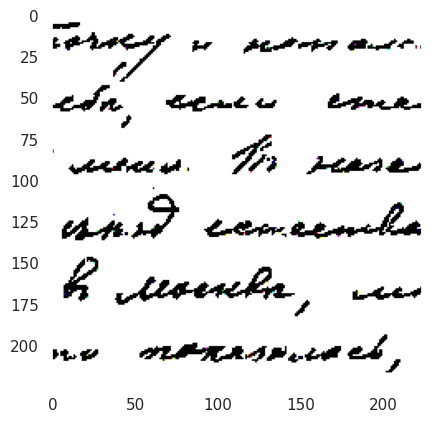

In [18]:
i = 0
image, cls = dataset[0]
image = image.permute(1, 2, 0).numpy()
print(image.shape)
plt.imshow(image)
plt.grid(False)

## MNIST LSTM

In [26]:
class Network_MNIST_LSTM(nn.Module):
    def __init__(self, in_channels=3, out_channels=10, emb_size=22, hid_size=32, num_layers=1):
        super().__init__()
        self.CNN = nn.Sequential(
                     nn.Conv2d(in_channels=in_channels, out_channels=3, kernel_size=3),
                     nn.BatchNorm2d(3),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3),
                     nn.BatchNorm2d(5),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),

                     nn.Conv2d(in_channels=5, out_channels=out_channels, kernel_size=3),
                     nn.BatchNorm2d(10),
                     nn.ReLU(),
                     # nn.MaxPool2d(kernel_size=2, stride=(2, 2)),
                    )

        self.linear = nn.Linear(out_channels, 1)

        self.LSTM = nn.LSTM(input_size=emb_size, # emb_size зависит от CNN
                            hidden_size=hid_size,
                            num_layers=num_layers,
                            batch_first=True)
        

        self.classifier = nn.Sequential(nn.Linear(hid_size, 10))
        # self.classifier = nn.Sequential(nn.Flatten(),
        #                                 nn.Linear(22 * 22, 10)) 
        
        # self.classifier = nn.Sequential(nn.Flatten(),
        #                                 nn.LazyLinear(10))


    def forward(self, x):
        # x ~ BATCH_SIZE x C x EMB_SIZE x SEQ_LEN
        x = self.CNN(x) # BATCH_SIZE x out_channels x EMB_SIZE_new x SEQ_LEN_new
        x = x.permute(0, 2, 3, 1) # BATCH_SIZE x EMB_SIZE_new x SEQ_LEN_new x out_channels
        x = self.linear(x).squeeze() # BATCH_SIZE x EMB_SIZE_new x SEQ_LEN_new
        # print(x.shape)

        x = x.permute(0, 2, 1) # BATCH_SIZE x SEQ_LEN_new x EMB_SIZE_new
        x, _ = self.LSTM(x) # BATCH_SIZE x SEQ_LEN_new x HIDDEN_SIZE

        x = x.mean(dim = 1) # BATCH_SIZE x HIDDEN_SIZE
        x = self.classifier(x)
        # x = self.classifier(x)
        
        return x # BATCH_SIZE x HIDDEN_SIZE

In [27]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

model = Network_MNIST_LSTM().to(device)
print(f"Parameters number: {number_of_parameters(model)}")

transform = transforms.ToTensor() 

# train_dataset = My_Dataset("MNIST/train", transform)
# test_dataset = My_Dataset("MNIST/test", transform)
train_dataset, test_dataset = split_dataset(My_Dataset("MNIST/test", transform))
train_dataset = test_dataset
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")


test_pipeline(model, train_dataset, device, batch_size=64)

Device: cpu
Parameters number: 8229
split_dataset: Train: 8000 Test: 2000 Total: 10000
train dataset: 2000, test dataset: 2000
X_batch: torch.Size([64, 3, 28, 28])
y_batch: torch.Size([64])
model:   torch.Size([64, 10])


In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(model, optimizer, criterion, dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

00:00:02 epoch:   0, train/val loss = 2.30046 / 2.28612, acc = 14.55000 / 19.50000
00:00:05 epoch:   1, train/val loss = 2.26275 / 2.22748, acc = 20.70000 / 21.50000
00:00:07 epoch:   2, train/val loss = 2.17957 / 2.11296, acc = 26.90000 / 34.85000
00:00:09 epoch:   3, train/val loss = 2.03642 / 1.94389, acc = 41.35000 / 50.40000
00:00:11 epoch:   4, train/val loss = 1.86415 / 1.76655, acc = 54.40000 / 60.00000
00:00:13 epoch:   5, train/val loss = 1.70155 / 1.61273, acc = 61.90000 / 64.50000
00:00:16 epoch:   6, train/val loss = 1.55268 / 1.47745, acc = 65.05000 / 68.35000
00:00:18 epoch:   7, train/val loss = 1.41898 / 1.34673, acc = 68.95000 / 71.65000
00:00:21 epoch:   8, train/val loss = 1.30284 / 1.22419, acc = 72.45000 / 74.60000
00:00:23 epoch:   9, train/val loss = 1.18544 / 1.12240, acc = 74.90000 / 76.50000
00:00:25 epoch:  10, train/val loss = 1.08600 / 1.03165, acc = 76.65000 / 77.85000
00:00:28 epoch:  11, train/val loss = 1.00112 / 0.96367, acc = 78.10000 / 78.60000
00:0

# Experiments

In [6]:
def create_model(model, num_non_freeze, num_out_classes, verbose=False):
    # замена последнего слоя сети
    model.fc = nn.Linear(512, num_out_classes)

    num_param = number_of_parameters(model)
    num_freeze = num_param - num_non_freeze

    # заморозка слоев
    cur_freeze = 0
    for i, layer in enumerate(model.children()):
        for param in layer.parameters():
            if param.requires_grad:
                if cur_freeze >= num_freeze:
                    return model

                param.requires_grad = False
                cur_freeze += param.numel()
                if verbose:
                    print(num_param - cur_freeze)

In [7]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)
emb_dim = 128 # 1000
num_non_freeze = 513000 #
model = create_model(model, num_non_freeze, emb_dim).to(device)
print(f"Parameters number: {number_of_parameters(model)}")

# transform = transforms.ToTensor() 
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
    ])

dataset = My_Dataset("КККМfolder10_bin", transform)
print(len(dataset))
train_dataset, test_dataset = split_dataset(dataset)
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")


test_pipeline(model, train_dataset, device, batch_size=64)

Device: cpu
Parameters number: 66688
368
split_dataset: Train: 294 Test: 74 Total: 368
train dataset: 294, test dataset: 74
X_batch: torch.Size([64, 3, 224, 224])
y_batch: torch.Size([64])
model:   torch.Size([64, 128])


In [8]:
dataset = My_TripletDataset("КККМfolder10_bin", transform)
print(len(dataset))
train_dataset, test_dataset = split_dataset(dataset)
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.TripletMarginLoss(margin=9, p=2)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(model, optimizer, criterion, type = "siam", dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 20)

368
split_dataset: Train: 294 Test: 74 Total: 368
train dataset: 294, test dataset: 74


  0%|          | 0/20 [00:00<?, ?it/s]

00:02:14 epoch:   0, train/val loss = 8.73515 / 8.87630, acc = 59.86395 / 60.81081
00:04:18 epoch:   1, train/val loss = 8.65549 / 8.41407, acc = 62.58503 / 67.56757
00:06:17 epoch:   2, train/val loss = 8.45975 / 8.24673, acc = 64.62585 / 67.56757
00:08:13 epoch:   3, train/val loss = 8.50789 / 8.05806, acc = 62.58503 / 74.32432
00:10:08 epoch:   4, train/val loss = 8.33519 / 8.52936, acc = 63.26531 / 60.81081
00:12:03 epoch:   5, train/val loss = 8.17966 / 8.04040, acc = 67.00680 / 59.45946
00:13:31 epoch:   6, train/val loss = 8.15934 / 8.43947, acc = 68.36735 / 66.21622
00:14:47 epoch:   7, train/val loss = 7.78084 / 7.24260, acc = 67.00680 / 64.86486
00:16:19 epoch:   8, train/val loss = 7.60969 / 8.25027, acc = 71.42857 / 60.81081
00:18:02 epoch:   9, train/val loss = 7.57856 / 7.35403, acc = 67.34694 / 72.97297
00:19:56 epoch:  10, train/val loss = 7.52668 / 7.60140, acc = 65.64626 / 64.86486
00:21:41 epoch:  11, train/val loss = 7.19848 / 7.63237, acc = 70.74830 / 64.86486
00:2

In [9]:
def ToModel(model, device):
    def fun(tensor, model=model, device=device):
        return model(tensor[None, :].to(device))[0]
    return fun

In [10]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

num_classes = 9
cl_model = nn.Sequential(nn.Linear(emb_dim, 512), nn.ReLU(), nn.Linear(512, num_classes)).to(device)

# transform = transforms.ToTensor() 
transform = transforms.Compose(
    [
            transforms.RandomCrop(300),
            transforms.CenterCrop(224),
            # transforms.RandomPerspective(distortion_scale=0.5, p=0.5, fill=255),
            transforms.ToTensor(),
            ToModel(model, device),
    ])

dataset = My_Dataset("КККМfolder10_bin", transform)
print(len(dataset))
train_dataset, test_dataset = split_dataset(dataset)
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")

test_pipeline(cl_model, train_dataset, device, batch_size=64)

Device: cpu
368
split_dataset: Train: 294 Test: 74 Total: 368
train dataset: 294, test dataset: 74


X_batch: torch.Size([64, 128])
y_batch: torch.Size([64])
model:   torch.Size([64, 9])


In [11]:
optimizer = torch.optim.Adam(cl_model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(cl_model, optimizer, criterion, type = "not siam", dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

00:01:38 epoch:   0, train/val loss = 2.23260 / 2.18084, acc = 7.82313 / 16.21622
00:03:05 epoch:   1, train/val loss = 2.14547 / 2.15160, acc = 18.02721 / 16.21622
00:04:02 epoch:   2, train/val loss = 2.14871 / 2.17468, acc = 18.02721 / 16.21622
00:04:48 epoch:   3, train/val loss = 2.15887 / 2.17712, acc = 18.02721 / 16.21622
00:05:31 epoch:   4, train/val loss = 2.14672 / 2.17724, acc = 18.02721 / 16.21622
00:06:14 epoch:   5, train/val loss = 2.14135 / 2.17828, acc = 18.02721 / 16.21622
00:06:58 epoch:   6, train/val loss = 2.14888 / 2.18336, acc = 17.00680 / 16.21622
00:07:43 epoch:   7, train/val loss = 2.14288 / 2.16904, acc = 14.28571 / 16.21622
00:08:29 epoch:   8, train/val loss = 2.14445 / 2.16178, acc = 17.00680 / 17.56757
00:09:15 epoch:   9, train/val loss = 2.14386 / 2.16652, acc = 19.72789 / 16.21622
00:10:01 epoch:  10, train/val loss = 2.14113 / 2.16992, acc = 18.02721 / 16.21622
00:10:44 epoch:  11, train/val loss = 2.14030 / 2.17214, acc = 18.02721 / 16.21622
Val l

In [ ]:
dataset = My_TripletDataset("КККМfolder10_bin", transform)
print(len(dataset))
# train_dataset, test_dataset = split_dataset(dataset)
train_dataset, test_dataset = dataset, dataset
print(f"train dataset: {len(train_dataset)}, test dataset: {len(test_dataset)}")

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.TripletMarginLoss(margin=9, p=2)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

trainer = Trainer(model, optimizer, criterion, type = "siam", dir = "logs", name = "cnn_mnist")

trainer.train(train_loader, val_loader, n_epochs = 20)